## EDA

In [1]:
#Importing libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import squarify 
import matplotlib.dates as dates 
from datetime import datetime
import xgboost as xgboost 

In [2]:
data = pd.read_csv('commerce_data.csv')
data.head()

,time,event_name,product_id,category_id,category_name,brand,price,user_id,session,category_1,category_2,category_3
0,2019-12-16 02:00:59+09,view,5748490,1487580006350586771,appliances.environment.vacuum,Not defined,26.97,527803604,1c8250d5-79e6-4080-aa13-d2e73c596fa2,appliances,environment,vacuum
1,2019-12-16 02:01:23+09,view,5856191,1487580006350586771,appliances.environment.vacuum,runail,24.44,587394396,2721b750-3936-4196-ba9b-206e823f725d,appliances,environment,vacuum
2,2019-12-16 02:01:56+09,view,5867188,1487580006350586771,appliances.environment.vacuum,emil,55.56,527803604,1c8250d5-79e6-4080-aa13-d2e73c596fa2,appliances,environment,vacuum
3,2019-12-16 02:05:17+09,view,5826657,1487580006350586771,appliances.environment.vacuum,Not defined,29.71,527803604,1c8250d5-79e6-4080-aa13-d2e73c596fa2,appliances,environment,vacuum
4,2019-12-16 02:05:38+09,view,8098,1487580006350586771,appliances.environment.vacuum,Not defined,1.11,587355096,79c56618-fb25-41f2-87c9-bbc55880c884,appliances,environment,vacuum


In [3]:
data = pd.read_csv('commerce_data.csv')
data.head()

,time,event_name,product_id,category_id,category_name,brand,price,user_id,session,category_1,category_2,category_3
0,2019-12-16 02:00:59+09,view,5748490,1487580006350586771,appliances.environment.vacuum,Not defined,26.97,527803604,1c8250d5-79e6-4080-aa13-d2e73c596fa2,appliances,environment,vacuum
1,2019-12-16 02:01:23+09,view,5856191,1487580006350586771,appliances.environment.vacuum,runail,24.44,587394396,2721b750-3936-4196-ba9b-206e823f725d,appliances,environment,vacuum
2,2019-12-16 02:01:56+09,view,5867188,1487580006350586771,appliances.environment.vacuum,emil,55.56,527803604,1c8250d5-79e6-4080-aa13-d2e73c596fa2,appliances,environment,vacuum
3,2019-12-16 02:05:17+09,view,5826657,1487580006350586771,appliances.environment.vacuum,Not defined,29.71,527803604,1c8250d5-79e6-4080-aa13-d2e73c596fa2,appliances,environment,vacuum
4,2019-12-16 02:05:38+09,view,8098,1487580006350586771,appliances.environment.vacuum,Not defined,1.11,587355096,79c56618-fb25-41f2-87c9-bbc55880c884,appliances,environment,vacuum


In [4]:
df = data.drop(['time', 'product_id','category_id', 'category_name', 'brand', 'user_id', 'session', 'category_1',
               'category_2', 'category_3'], axis =1)
df.head()

,event_name,price
0,view,26.97
1,view,24.44
2,view,55.56
3,view,29.71
4,view,1.11


In [5]:
df.isnull().sum()

event_name    0
price         0
dtype: int64

In [6]:
df.dtypes

event_name     object
price         float64
dtype: object

In [7]:
df = df[df.price != 0]
df.head()
df.count()

event_name    3525697
price         3525697
dtype: int64

In [8]:
found = df['price'].isin([0])
df1 = pd.DataFrame({'price': found})
df1['price'].value_counts()

False    3525697
Name: price, dtype: int64

In [9]:
df = df[df.event_name != 'cart']
df = df[df.event_name != 'view']
df.head(100)

,event_name,price
8,remove_from_cart,4.16
10,remove_from_cart,1.11
11,purchase,1.27
12,purchase,24.60
22,remove_from_cart,24.60
...,...,...
594,remove_from_cart,24.44
595,remove_from_cart,24.44
597,remove_from_cart,46.83
598,remove_from_cart,46.83


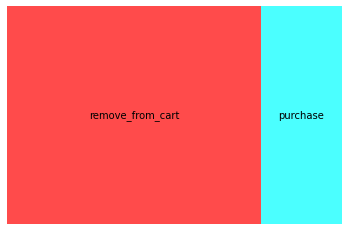

In [10]:
top_event = df.loc[:,'event_name'].value_counts().sort_values(ascending=False)
squarify.plot(sizes=top_event, label = top_event.index.array, color=["red","cyan","green","blue"], alpha=.7)
plt.axis('off')
plt.show()

### XGBoost

In [11]:
# Isolate the X and Y varaibles 
y = df.iloc[:,0]
x = df._get_numeric_data()
print(y)
#print(x)

8          remove_from_cart
10         remove_from_cart
11                 purchase
12                 purchase
22         remove_from_cart
                 ...       
3533270    remove_from_cart
3533271    remove_from_cart
3533272    remove_from_cart
3533278    remove_from_cart
3533279    remove_from_cart
Name: event_name, Length: 877516, dtype: object


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#Split dataset into training and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .9, random_state = 3525696 )
print(x_train)
print('NEXT',x_test)
print('NEXT', y_train)
print('NEXT', y_test)

         price
661312    3.00
2899609   3.02
407648    1.75
3073055   5.62
2441813   1.59
...        ...
2630979   5.49
447875   12.54
2455563   3.97
305267    0.79
2808452   3.16

[87751 rows x 1 columns]
NEXT          price
1236634   7.78
331680   16.67
3319350   2.37
970019    4.05
1149362   3.14
...        ...
1252943   6.49
2985125   0.79
695110    5.56
1662357   2.05
914078    1.02

[789765 rows x 1 columns]
NEXT 661312     remove_from_cart
2899609    remove_from_cart
407648     remove_from_cart
3073055    remove_from_cart
2441813            purchase
                 ...       
2630979    remove_from_cart
447875     remove_from_cart
2455563            purchase
305267     remove_from_cart
2808452            purchase
Name: event_name, Length: 87751, dtype: object
NEXT 1236634    remove_from_cart
331680     remove_from_cart
3319350    remove_from_cart
970019     remove_from_cart
1149362    remove_from_cart
                 ...       
1252943    remove_from_cart
2985125    remove_fro

In [14]:
#Transform y factor to variable 
y_train = np.where(y_train == 'remove_from_cart', 1, 0)
y_test = np.where(y_test == 'remove_from_cart', 1, 0)
print(y_train)
print(y_test)
print(np.mean(y_train))
np.mean(y_test)

[1 1 1 ... 0 1 0]
[1 1 1 ... 0 0 1]
0.757073993458764


0.7570682418187689

In [15]:
#Create xgboost matrices 
Train = xgboost.DMatrix(x_train, label = y_train)
Test = xgboost.DMatrix(x_test, label = y_test)
print(Train)
print(Test)

In [16]:
#Setting parameters 
parameters1 = {'learning_rate': 0.3, 
              'max_depth': 2,
              'colsample_bytree': 1, 
               'subsample': 1, 
               'min_child_weight': 1,
               'gamma' : 0,
               'random_state' : 3525696, 
               'eval_metric': 'auc',
               'objective': 'binary:logistic'}

In [17]:
#Run xgboost 
model1 = xgboost.train(params = parameters1, 
                      dtrain = Train, 
                      num_boost_round = 200, 
                      evals = [(Test, 'Yes')],
                      verbose_eval = 50)

[0]	Yes-auc:0.53300
[50]	Yes-auc:0.55773
[100]	Yes-auc:0.56085
[150]	Yes-auc:0.56179
[199]	Yes-auc:0.56261


In [18]:
#Predictions 
predictions1 = model1.predict(Test)
predictions1 = np.where(predictions1 > 0.8, 1, 0)
print(predictions1)

[0 0 0 ... 0 1 0]


In [19]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
confusion_matrix1 = confusion_matrix(y_test, predictions1)
print(confusion_matrix1)

[[170645  21214]
 [505217  92689]]


In [20]:
report1 = classification_report(y_test, predictions1)
print(report1)

              precision    recall  f1-score   support

           0       0.25      0.89      0.39    191859
           1       0.81      0.16      0.26    597906

    accuracy                           0.33    789765
   macro avg       0.53      0.52      0.33    789765
weighted avg       0.68      0.33      0.29    789765



In [21]:
################

#Isolate categorical variables 
dataset_categorical = df.select_dtypes(exclude = 'number')
dataset_categorical.head()

,event_name
8,remove_from_cart
10,remove_from_cart
11,purchase
12,purchase
22,remove_from_cart


In [22]:
#Transform categorical variables into dummy variables 
dataset_categorical = pd.get_dummies(data = dataset_categorical,
                                    drop_first = True)
dataset_categorical.head()

,event_name_remove_from_cart
8,1
10,1
11,0
12,0
22,1


In [23]:
#Joining numerical and categorical datasets 
final_dataset = pd.concat((x, dataset_categorical), axis = 1)
final_dataset

,price,event_name_remove_from_cart
8,4.16,1
10,1.11,1
11,1.27,0
12,24.60,0
22,24.60,1
...,...,...
3533270,24.60,1
3533271,24.60,1
3533272,1.11,1
3533278,82.54,1


In [24]:
#Getting names of columns 
feature_columns = list(final_dataset.columns.values)
feature_columns 

['price', 'event_name_remove_from_cart']

In [25]:
#####################################################################
# Isolate the X and Y varaibles part 2 
y = final_dataset.iloc[:,-1].values
x = final_dataset.iloc[:, : -1].values

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .9, random_state = 3525696 )
print(x_train)
print('NEXT',x_test)
print('NEXT', y_train)
print('NEXT', y_test)
#print(y)
#print(x)

[[3.  ]
 [3.02]
 [1.75]
 ...
 [3.97]
 [0.79]
 [3.16]]
NEXT [[ 7.78]
 [16.67]
 [ 2.37]
 ...
 [ 5.56]
 [ 2.05]
 [ 1.02]]
NEXT [1 1 1 ... 0 1 0]
NEXT [1 1 1 ... 0 0 1]


In [27]:
#Create xgboost matrices part 2 
Train = xgboost.DMatrix(x_train, label = y_train) #, feature_names = feature_columns)
Test = xgboost.DMatrix(x_test, label = y_test) #, feature_names = feature_columns)
print(Train)
print(Test)

In [28]:
#Setting parameters part 2
parameters2 = {'learning_rate': 0.3, 
              'max_depth': 2,
              'colsample_bytree': 1, 
               'subsample': 1, 
               'min_child_weight': 1,
               'gamma' : 0,
               'random_state' : 3525696, 
               'eval_metric': 'auc',
               'objective': 'binary:logistic'}

In [29]:
#Run xgboost 
model2 = xgboost.train(params = parameters2, 
                      dtrain = Train, 
                      num_boost_round = 200, 
                      evals = [(Test, 'Yes')],
                      verbose_eval = 50)

[0]	Yes-auc:0.53300
[50]	Yes-auc:0.55773
[100]	Yes-auc:0.56085
[150]	Yes-auc:0.56179
[199]	Yes-auc:0.56261


In [30]:
#Predictions part 2
predictions2 = model2.predict(Test)
predictions2 = np.where(predictions2 > 0.8, 1, 0)
print(predictions1)

[0 0 0 ... 0 1 0]


In [31]:
#Confusion Matrix 
confusion_matrix2 = confusion_matrix(y_test, predictions1)
print(confusion_matrix2)

[[170645  21214]
 [505217  92689]]


In [32]:
report2 = classification_report(y_test, predictions2)
print(report2)

              precision    recall  f1-score   support

           0       0.25      0.89      0.39    191859
           1       0.81      0.16      0.26    597906

    accuracy                           0.33    789765
   macro avg       0.53      0.52      0.33    789765
weighted avg       0.68      0.33      0.29    789765



In [33]:
##################################################################################

#checking how many cores we have 
import multiprocessing

In [34]:
multiprocessing.cpu_count()

8

In [35]:
#Setting the cross validation parameters 
from sklearn.model_selection import KFold 
tune_control = KFold(n_splits= 5, 
                    shuffle = True, 
                    random_state = 3525696 ).split( X = x_train, 
                                                  y = y_train)
tune_control

<generator object _BaseKFold.split at 0x00000140970C14A0>

In [36]:
#Set parameter tuning 
tune_grid = {'learning_rate': [0.05, 0.3], 
              'max_depth': range(2, 9, 2),
              'colsample_bytree': [1, 5, 1],
               'subsample': [1], 
               'min_child_weight': [1],
               'gamma' : [0],
               'random_state' : [3525696],
            'n_estimators' :range (200, 2000, 200), 
            'booster' : ['gbtree']}

In [37]:
#State that we are doing a classification problem 
from xgboost import XGBClassifier 
classifier = XGBClassifier(objective = 'binary: logisitic')


In [38]:
#Cross Validation Assembly 
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, 
                          param_grid = tune_grid, 
                          scoring = 'roc_auc', 
                           n_jobs = 7, 
                           cv = tune_control, 
                           verbose = 5)

In [39]:
#Setting evaluation parameters 
evaluation_parameters = {'early_stopping_rounds': 100, 
                        'eval_metric': 'auc',
                        'eval_set': [(x_test, y_test)]}

In [40]:
#Hyperparameter tuning and cross validation 
tune_model = grid_search.fit(X = x_train, 
                            y = y_train, 
                            **evaluation_parameters)

#grid_search.best_params_, grid_seatch.best_score_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    2.8s
[Parallel(n_jobs=7)]: Done  58 tasks      | elapsed:    6.6s
[Parallel(n_jobs=7)]: Done 148 tasks      | elapsed:   13.6s
[Parallel(n_jobs=7)]: Done 274 tasks      | elapsed:   22.4s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:   35.1s
[Parallel(n_jobs=7)]: Done 634 tasks      | elapsed:   52.9s
[Parallel(n_jobs=7)]: Done 868 tasks      | elapsed:  1.3min
[Parallel(n_jobs=7)]: Done 1080 out of 1080 | elapsed:  1.8min finished


XGBoostError: [23:58:49] C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\objective\objective.cc:26: Unknown objective function: `binary: logisitic`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: reg:pseudohubererror
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: count:poisson
Objective candidate: survival:cox
